## Подбор алгоритмов и их параметров для решения задачи регрессии ##

### Датасет: Boston house-prices ###

`https://archive.ics.uci.edu/ml/machine-learning-databases/housing`

In [1]:
from sklearn.datasets import load_boston

### Загружаем данные ###

In [2]:
# загружаем данные
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [5]:
# преобразуем данные в объекты pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
x.shape, y.shape

((506, 13), (506,))

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

### Смотрим данные, проводим описательный анализ признаков ###

In [8]:
x.isnull().any().any(), y.isnull().any()

(False, False)

In [9]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
# смотрим последовательно все фичи и для каждой определяем, нужна ли предобработка и какая
cols_drop, cols_norm, cols_dummy, cols_le = [], [], [], []

In [11]:
x.CRIM.value_counts()

14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
           ..
0.05602     1
0.26838     1
0.02177     1
1.83377     1
15.86030    1
7.67202     1
51.13580    1
15.17720    1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

In [12]:
# CRIM - уровень преступности, числовой, нормализация
cols_norm.append('CRIM')

In [13]:
x.ZN.value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [14]:
# ZN - доля жилой площади для лотов площадью более 25 тысяч футов, числовой, нормализация
cols_norm.append('ZN')

In [15]:
x.INDUS.value_counts()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
9.90      12
3.97      12
8.56      11
10.59     11
5.86      10
10.01      9
6.91       9
7.38       8
2.46       8
5.19       8
9.69       8
7.87       7
25.65      7
2.18       7
4.05       7
5.13       6
3.44       6
12.83      6
4.93       6
13.92      5
6.96       5
27.74      5
11.93      5
2.89       5
6.41       5
        ... 
2.03       2
7.07       2
1.91       2
2.93       2
6.06       2
1.47       2
3.37       2
1.69       2
2.95       2
1.25       2
3.64       2
3.78       2
2.68       2
4.39       2
1.38       1
2.97       1
2.25       1
3.75       1
1.89       1
1.22       1
1.32       1
0.74       1
1.76       1
2.31       1
0.46       1
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

In [16]:
# INDUS - доля некоммерческой недвижимости (?), числовой, нормализация
cols_norm.append('INDUS')

In [17]:
x.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [18]:
# CHAS - Charles River dummy variable (не совсем понятно, что это), категориальный бинарный, one hot encoding
cols_dummy.append('CHAS')

In [19]:
x.NOX.value_counts()

0.5380    23
0.7130    18
0.4370    17
0.8710    16
0.4890    15
0.6240    15
0.6930    14
0.6050    14
0.7400    13
0.5440    12
0.7000    11
0.5200    11
0.6470    10
0.5070    10
0.4310    10
0.4480     9
0.5470     9
0.4880     8
0.4640     8
0.4930     8
0.7700     8
0.4280     8
0.5040     8
0.5850     8
0.5840     8
0.5150     8
0.6790     8
0.5240     7
0.5810     7
0.6140     7
          ..
0.4429     4
0.4000     4
0.4050     3
0.4100     3
0.6550     3
0.4090     3
0.4290     3
0.4580     3
0.4330     3
0.4040     3
0.6680     3
0.4161     3
0.4010     3
0.4030     3
0.4600     3
0.4420     3
0.5750     2
0.3980     2
0.4690     2
0.4840     2
0.3920     2
0.4150     2
0.6590     2
0.4379     2
0.4350     1
0.3850     1
0.3940     1
0.5180     1
0.4220     1
0.3890     1
Name: NOX, Length: 81, dtype: int64

In [20]:
# NOX - уровень концентрации оксидов азота, числовой, нормализация
cols_norm.append('NOX')

In [21]:
x.RM.value_counts()

6.167    3
6.229    3
6.127    3
5.713    3
6.417    3
6.405    3
6.380    2
5.304    2
5.983    2
7.185    2
5.856    2
6.968    2
7.820    2
5.936    2
6.030    2
6.251    2
6.431    2
6.727    2
6.004    2
6.185    2
6.193    2
6.495    2
5.757    2
6.782    2
6.951    2
5.404    2
6.009    2
6.794    2
6.315    2
5.935    2
        ..
6.112    1
6.006    1
7.147    1
5.468    1
5.707    1
7.267    1
6.800    1
5.818    1
6.430    1
6.762    1
6.593    1
7.178    1
5.570    1
5.884    1
6.471    1
7.107    1
6.382    1
6.575    1
7.287    1
5.898    1
5.403    1
8.266    1
6.101    1
5.093    1
5.036    1
6.552    1
4.368    1
6.174    1
6.701    1
6.625    1
Name: RM, Length: 446, dtype: int64

In [22]:
# RM - среднее количество комнат в доме, числовой, нормализация
cols_norm.append('RM')

In [23]:
x.AGE.value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
87.9      4
98.8      4
94.1      3
88.0      3
21.4      3
96.2      3
98.9      3
97.3      3
32.2      3
97.0      3
92.6      3
36.6      3
97.4      3
95.6      3
76.5      3
94.5      2
91.9      2
6.6       2
77.7      2
18.5      2
21.9      2
84.1      2
94.6      2
82.6      2
93.6      2
         ..
77.8      1
78.9      1
38.1      1
66.6      1
37.2      1
89.9      1
74.8      1
61.8      1
45.6      1
78.3      1
96.8      1
95.7      1
62.2      1
73.9      1
44.4      1
97.8      1
24.8      1
68.2      1
35.9      1
64.7      1
18.8      1
46.7      1
27.6      1
97.7      1
81.3      1
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [24]:
# AGE - доля объектов, построенных до 1940 года, числовой, нормализация
cols_norm.append('AGE')

In [25]:
x.DIS.value_counts()

3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
3.6519    3
7.3172    3
5.4917    3
7.8278    3
5.4159    3
6.4980    3
7.3090    3
4.8122    3
6.0622    3
6.4798    3
5.1167    3
6.3361    3
3.9454    3
4.7211    3
3.3751    2
2.4259    2
3.7965    2
3.2721    2
7.9549    2
7.3073    2
2.7147    2
4.3549    2
5.1180    2
4.1480    2
5.9604    2
         ..
1.9265    1
3.4106    1
2.7831    1
3.8771    1
2.2565    1
1.4655    1
3.7886    1
3.0993    1
3.9986    1
2.4631    1
2.2616    1
7.2255    1
3.1025    1
2.8290    1
2.4210    1
2.1974    1
4.4619    1
2.4329    1
1.3216    1
1.8773    1
3.3779    1
3.5459    1
1.7984    1
2.5480    1
1.7659    1
3.5549    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64

In [26]:
# DIS - среднее (усредненное, средневзвешенное) расстояние до пяти центор занятости Бостона, числовой, нормализация
cols_norm.append('DIS')

In [27]:
x.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [28]:
# RAD - индекс доступности радиальных автомагистралей, числовой (хотя можно рассмотреть и как категориальный), нормализация
cols_norm.append('RAD')

In [29]:
x.TAX.value_counts()

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
264.0     12
398.0     12
277.0     11
384.0     11
330.0     10
224.0     10
432.0      9
233.0      9
276.0      9
391.0      8
193.0      8
296.0      8
287.0      8
188.0      7
270.0      7
300.0      7
311.0      7
284.0      7
222.0      7
329.0      6
216.0      5
223.0      5
254.0      5
273.0      5
711.0      5
        ... 
345.0      3
293.0      3
430.0      3
245.0      3
358.0      3
242.0      2
411.0      2
348.0      2
402.0      2
252.0      2
337.0      2
335.0      2
265.0      2
315.0      2
370.0      2
334.0      2
352.0      2
351.0      1
226.0      1
256.0      1
244.0      1
241.0      1
198.0      1
285.0      1
422.0      1
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64

In [30]:
# TAX - сумма налога на имущество на 10 тысяч долларов стоимости объекта, числовой, нормализация
cols_norm.append('TAX')

In [31]:
x.PTRATIO.value_counts()

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
20.1      5
16.1      5
16.9      5
16.8      4
14.9      4
19.0      4
18.5      4
17.0      4
18.2      4
18.3      4
12.6      3
14.8      3
18.9      3
15.3      3
15.9      2
22.0      2
15.6      2
18.8      2
15.5      1
17.3      1
15.1      1
21.1      1
13.6      1
14.4      1
Name: PTRATIO, dtype: int64

In [32]:
# PTRATIO - количество учеников на одного учителя, числовой, нормализация
cols_norm.append('PTRATIO')

In [33]:
x.B.value_counts()

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
396.21      2
395.69      2
396.06      2
395.63      2
395.60      2
392.78      2
391.34      2
395.58      2
377.07      2
394.12      2
395.11      2
376.14      2
395.56      2
389.71      2
390.94      2
341.60      2
388.45      2
393.37      2
393.68      2
392.80      2
393.45      2
395.62      2
374.71      2
392.20      1
394.62      1
         ... 
392.85      1
384.54      1
384.07      1
376.94      1
394.95      1
24.65       1
334.40      1
285.83      1
387.89      1
379.38      1
386.40      1
379.41      1
379.70      1
390.07      1
382.84      1
393.25      1
354.70      1
395.93      1
362.25      1
318.75      1
395.01      1
43.06       1
391.98      1
354.31      1
388.08      1
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 357, dtype: int64

In [34]:
# B - показатель, отражающий долю чернокожего населения, числовой, нормализация
cols_norm.append('B')

In [35]:
x.LSTAT.value_counts()

14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
9.50     2
4.59     2
3.76     2
17.27    2
10.11    2
4.56     2
3.16     2
15.17    2
23.98    2
10.45    2
14.81    2
5.68     2
6.72     2
12.43    2
7.44     2
15.02    2
13.15    2
8.10     2
30.81    2
18.06    2
7.60     2
12.03    2
17.60    2
3.53     2
3.11     2
        ..
17.58    1
26.45    1
7.74     1
6.92     1
9.28     1
20.34    1
16.47    1
3.26     1
5.91     1
4.03     1
10.29    1
7.14     1
6.90     1
3.73     1
13.33    1
29.53    1
14.15    1
12.64    1
6.57     1
14.64    1
13.22    1
10.63    1
27.80    1
13.09    1
6.43     1
9.69     1
9.62     1
5.64     1
22.98    1
29.05    1
Name: LSTAT, Length: 455, dtype: int64

In [36]:
# LSTAT - доля населения за чертой бедности (но это не точно), числовой, нормализация
cols_norm.append('LSTAT')

In [37]:
y.value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
        ..
12.3     1
37.6     1
29.4     1
12.6     1
22.1     1
31.1     1
48.3     1
26.2     1
11.0     1
9.5      1
12.0     1
17.7     1
44.8     1
35.1     1
32.4     1
42.3     1
28.2     1
31.2     1
33.3     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Length: 229, dtype: int64

In [38]:
# целевая переменная - стоимость единицы площади недвижимости (судя по всему, квадратного фута)

### Разделяем данные на обучающую и валидационную выборки ###

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((404, 13), (102, 13), (404,), (102,))

### Препроцессинг данных ###

In [40]:
cols_drop, cols_dummy, cols_le, cols_norm

([],
 ['CHAS'],
 [],
 ['CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [41]:
del cols_drop
del cols_le

In [42]:
# нормализуем числовые данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[cols_norm])
x_train[cols_norm] = scaler.transform(x_train[cols_norm])
x_valid[cols_norm] = scaler.transform(x_valid[cols_norm])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

In [43]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
504,-0.394690,-0.506120,0.146294,0.0,0.204548,0.722647,0.767258,-0.698988,-0.975944,-0.795477,1.178327,0.384589,-0.843110
393,0.520528,-0.506120,1.054252,0.0,1.256326,-0.158622,0.883727,-0.977516,1.697544,1.573231,0.810050,0.423408,0.403156
341,-0.405046,0.967935,-1.385610,0.0,-0.943643,1.378101,-0.644482,1.467443,-0.975944,-0.729177,-1.353577,0.399104,-0.985089
250,-0.391397,0.420429,-0.746949,0.0,-1.040056,0.272481,-1.925637,1.634644,-0.278512,-0.451924,0.303669,0.416432,-0.926290
155,-0.027385,-0.506120,1.272044,1.0,2.816462,-0.218742,0.530792,-0.998812,-0.510990,-0.011935,-1.721854,-3.052248,0.381644


In [44]:
# применяем one hot encoding к категориальным данным
x_train = pd.get_dummies(x_train, columns=cols_dummy)
x_valid = pd.get_dummies(x_valid, columns=cols_dummy)

In [45]:
x_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,CHAS_1.0
504,-0.394690,-0.506120,0.146294,0.204548,0.722647,0.767258,-0.698988,-0.975944,-0.795477,1.178327,0.384589,-0.843110,1,0
393,0.520528,-0.506120,1.054252,1.256326,-0.158622,0.883727,-0.977516,1.697544,1.573231,0.810050,0.423408,0.403156,1,0
341,-0.405046,0.967935,-1.385610,-0.943643,1.378101,-0.644482,1.467443,-0.975944,-0.729177,-1.353577,0.399104,-0.985089,1,0
250,-0.391397,0.420429,-0.746949,-1.040056,0.272481,-1.925637,1.634644,-0.278512,-0.451924,0.303669,0.416432,-0.926290,1,0
155,-0.027385,-0.506120,1.272044,2.816462,-0.218742,0.530792,-0.998812,-0.510990,-0.011935,-1.721854,-3.052248,0.381644,0,1


In [46]:
# если при one hot encoding некоторые значения фичей "потерялись", вручную добавляем "потерянные" столбцы
missing_cols = set(x_train.columns) - set(x_valid.columns)
for c in missing_cols:
    x_valid[c] = 0
x_valid = x_valid[x_train.columns]
set(x_train.columns) - set(x_valid.columns)

set()

In [47]:
list(x_train.columns) == list(x_valid.columns)

True

### Обучение моделей ###

In [48]:
# будем обучать модели, используя 5-fold кросс-валидацию и GridSearchCV для подбора параметров
# для оценки качества будем использовать метрики MSE, MAE, R2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
folds = 5

**Linear Regression**

In [49]:
from sklearn.linear_model import LinearRegression
lr_params = {}
lr = LinearRegression()
gs_lr = GridSearchCV(lr, lr_params, cv=folds)
gs_lr.fit(x_train, y_train)
print('Linear Regression\n')
print(f'Best params: {gs_lr.best_params_}')

y_pred_gs_lr = gs_lr.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_lr)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_lr)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_lr)}')

Linear Regression

Best params: {}
R2 score: 0.6392591854690246
MSE: 24.919713337796143
MAE: 3.54357206593076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Lasso Regression**

In [50]:
from sklearn.linear_model import Lasso
ls_params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'precompute': [True, False],
    'max_iter': [1000, 1500, 2000],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'warm_start': [True, False],
    'selection': ['cyclic', 'random']
}
ls = Lasso()
gs_ls = GridSearchCV(ls, ls_params, cv=folds)
gs_ls.fit(x_train, y_train)
print('Lasso Regression\n')
print(f'Best params: {gs_ls.best_params_}')

y_pred_gs_ls = gs_ls.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_ls)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_ls)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_ls)}')

Lasso Regression

Best params: {'alpha': 0.1, 'max_iter': 1500, 'precompute': True, 'selection': 'random', 'tol': 0.1, 'warm_start': False}
R2 score: 0.6397204090393667
MSE: 24.88785234870207
MAE: 3.4918166509065043


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**RidgeRegression**

In [51]:
from sklearn.linear_model import Ridge
rr_params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 1500, 2000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
rr = Ridge()
gs_rr = GridSearchCV(rr, rr_params, cv=folds)
gs_rr.fit(x_train, y_train)
print('Ridge Regression\n')
print(f'Best params: {gs_rr.best_params_}')

y_pred_gs_rr = gs_rr.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_rr)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_rr)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_rr)}')

Ridge Regression

Best params: {'alpha': 0.2, 'max_iter': 2000, 'solver': 'saga', 'tol': 0.1}
R2 score: 0.6540656365857678
MSE: 23.896894453664444
MAE: 3.3794935155561876


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**SVR**

In [52]:
from sklearn.svm import SVR
svr_params = {
    'C': [0.001, 0.01, 0.1, 0.25, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'shrinking': [True, False],
    'gamma': ['auto', 'scale']
}
svr = SVR()
gs_svr = GridSearchCV(svr, svr_params, cv=folds)
gs_svr.fit(x_train, y_train)
print('SVR\n')
print(f'Best params: {gs_svr.best_params_}')

y_pred_gs_svr = gs_svr.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_svr)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_svr)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_svr)}')

SVR

Best params: {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': True, 'tol': 0.0001}
R2 score: 0.6880512962667232
MSE: 21.549189778366095
MAE: 2.89334591850418


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_params = {
    'n_estimators': [5, 10, 40, 60, 100, 120],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}
rf = RandomForestRegressor()
gs_rf = GridSearchCV(rf, rf_params, cv=folds)
gs_rf.fit(x_train, y_train)
print('Random Forest Regressor\n')
print(f'Best params: {gs_rf.best_params_}')

y_pred_gs_rf = gs_rf.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_rf)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_rf)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_rf)}')

Random Forest Regressor

Best params: {'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 40}
R2 score: 0.7953031635773923
MSE: 14.140308718427896
MAE: 2.2874752885845786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


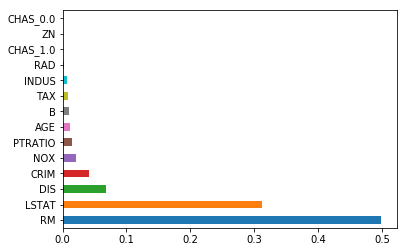

In [54]:
# построим график для feature importances
feat_importances = pd.Series(gs_rf.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

**KNN Regressor**

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knr_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 10, 20, 40]
}
knr = KNeighborsRegressor()
gs_knr = GridSearchCV(knr, knr_params, cv=folds)
gs_knr.fit(x_train, y_train)
print('KNN Regressor\n')
print(f'Best params: {gs_knr.best_params_}')

y_pred_gs_knr = gs_knr.best_estimator_.predict(x_valid)
print(f'R2 score: {r2_score(y_valid, y_pred_gs_knr)}')
print(f'MSE: {mean_squared_error(y_valid, y_pred_gs_knr)}')
print(f'MAE: {mean_absolute_error(y_valid, y_pred_gs_knr)}')

KNN Regressor

Best params: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'p': 1}
R2 score: 0.8196008679142994
MSE: 12.461840958605666
MAE: 2.2029411764705884


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Выводы ###

- наилучшие результаты показали модели SVR, Random Forest Regressor, KNN Regressor
- от запуска к запуску кода данного ноутбука результаты ощутимо менялись, это говорит о зависимости от конкретного разбиения датасета на обучающую и валидационную выборки